In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import math
import pymysql
pd.set_option('display.max_column',None)

In [4]:
!pip install pymysql


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
dbcon=pymysql.connect(host="localhost",user="root",password="root",database="sales_Anlysis")
dbcon

In [3]:
#loading product table
prd=pd.read_sql_query(""" select * from product """,dbcon,parse_dates=True)
prd

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\3120904958.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prd=pd.read_sql_query(""" select * from product """,dbcon,parse_dates=True)


,id,Name,category,Price
0,1,Government,Groceries,806.15
1,2,Fast,Clothing,588.58
2,3,Wait,Sports,996.14
3,4,Republican,Home & Kitchen,981.25
4,5,By,Books,854.99
...,...,...,...,...
495,496,Better,Books,83.26
496,497,Performance,Home & Kitchen,602.13
497,498,Sign,Sports,510.27
498,499,War,Clothing,386.82


In [4]:
#loading transcation table
trans=pd.read_sql_query(""" select * from transcations """,dbcon,parse_dates=True)
trans

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\2518429712.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trans=pd.read_sql_query(""" select * from transcations """,dbcon,parse_dates=True)


,t_id,cust_id,store_id,product_id,quantity,t_date,price,total
0,1,1785,54,30,2,2024-05-11,647.92,1295.84
1,2,893,42,497,2,2024-02-27,602.13,1204.26
2,3,3596,67,42,3,2024-05-29,896.60,2689.80
3,4,2733,98,208,2,2024-08-13,30.92,61.84
4,5,3770,83,346,1,2023-10-28,37.80,37.80
...,...,...,...,...,...,...,...,...
199995,199996,3557,11,54,2,2023-12-09,971.66,1943.32
199996,199997,2310,29,428,3,2023-11-22,832.72,2498.16
199997,199998,273,36,140,2,2023-08-22,337.76,675.52
199998,199999,3137,51,29,4,2024-07-24,537.06,2148.24


In [8]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   t_id        200000 non-null  int64  
 1   cust_id     200000 non-null  int64  
 2   store_id    200000 non-null  int64  
 3   product_id  200000 non-null  int64  
 4   quantity    200000 non-null  int64  
 5   t_date      200000 non-null  object 
 6   price       200000 non-null  float64
 7   total       200000 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 12.2+ MB


In [9]:
trans.describe()

,t_id,cust_id,store_id,product_id,quantity,price,total
count,200000.000000,200000.00000,200000.000000,200000.0000,200000.000000,200000.000000,200000.000000
mean,100000.500000,2496.64215,50.513690,250.4615,2.502815,505.090269,1264.640886
std,57735.171256,1442.89810,28.856076,144.2732,1.119106,287.075798,970.633719
min,1.000000,1.00000,1.000000,1.0000,1.000000,11.650000,11.650000
25%,50000.750000,1246.00000,26.000000,126.0000,2.000000,275.070000,500.920000
50%,100000.500000,2496.00000,51.000000,250.0000,3.000000,511.550000,975.930000
75%,150000.250000,3748.00000,75.000000,375.0000,4.000000,764.640000,1848.260000
max,200000.000000,5000.00000,100.000000,500.0000,4.000000,999.660000,3998.640000


In [5]:
#loading customer table
cust=pd.read_sql_query(""" select * from customers """,dbcon,parse_dates=True)
cust

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\3385991859.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cust=pd.read_sql_query(""" select * from customers """,dbcon,parse_dates=True)


,cust_id,Name,Email,location,sign_up_date
0,1,Michael Rogers,gibsonlisa@yahoo.com,East Joshua,2023-09-13
1,2,Sarah Turner,lynnreed@hotmail.com,Bradfordbury,2021-09-04
2,3,Jacob Allison,dawn22@holmes.com,West Jessica,2024-02-27
3,4,Alyssa Mclaughlin,thall@yahoo.com,Davismouth,2021-12-01
4,5,Paul Anderson,vberger@johnson.net,Ruizburgh,2021-07-21
...,...,...,...,...,...
4995,4996,Donald Smith,ghicks@yahoo.com,Dwaynetown,2024-04-05
4996,4997,Mark Chung,keith57@howell.com,Hamiltonbury,2024-03-02
4997,4998,Barbara Edwards,brent32@hotmail.com,Bensonmouth,2020-11-05
4998,4999,Kelly Brown,eweaver@yahoo.com,Davisside,2024-09-22


In [18]:
cust.isnull().sum()

cust_id         0
Name            0
Email           0
location        0
sign_up_date    0
dtype: int64

In [19]:
cust.describe()

,cust_id
count,5000.000000
mean,2500.500000
std,1443.520003
min,1.000000
25%,1250.750000
50%,2500.500000
75%,3750.250000
max,5000.000000


In [6]:
#loading stores tables
str=pd.read_sql_query(""" select * from stores """,dbcon,parse_dates=True)
str

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\913395420.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  str=pd.read_sql_query(""" select * from stores """,dbcon,parse_dates=True)


,store_id,Store_name,city,opened_Date
0,1,"Benton, Arnold and Sanders Store",New Tiffanyborough,2016-02-02
1,2,"Hurley, Melton and Sanchez Store",Robinsonhaven,2021-03-20
2,3,Marshall-Krause Store,West Jennifer,2021-06-12
3,4,"Jenkins, Love and Pugh Store",Lake Geraldmouth,2016-08-17
4,5,Jones-Martin Store,Blakeberg,2018-02-15
...,...,...,...,...
95,96,Ramirez-Hill Store,Andrewfort,2016-03-07
96,97,Fuller-Pearson Store,Bryantborough,2024-06-05
97,98,"Reeves, Smith and Martin Store",South Megan,2020-11-28
98,99,Mccarthy and Sons Store,Port Hannahshire,2017-07-29


In [12]:
str.isnull().sum()

store_id       0
Store_name     0
city           0
opened_Date    0
dtype: int64

In [13]:
str.describe()

,store_id
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [40]:
#loading inventory table
ivn=pd.read_sql_query(""" select * from inventory """,dbcon,parse_dates=True)
ivn

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\2837825494.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ivn=pd.read_sql_query(""" select * from inventory """,dbcon,parse_dates=True)


,store_id,product_id,stocks,last_restocked
0,29,34,159,2025-03-24
1,49,183,219,2024-08-18
2,37,105,158,2024-09-24
3,9,370,416,2024-07-26
4,8,9,6,2024-12-14
...,...,...,...,...
2897,92,319,172,2025-01-06
2898,27,339,469,2025-01-27
2899,15,480,476,2024-12-01
2900,66,71,93,2024-10-29


In [15]:
ivn.isnull().sum()

store_id          0
product_id        0
stocks            0
last_restocked    0
dtype: int64

In [16]:
ivn.describe()

,store_id,product_id,stocks
count,2902.000000,2902.000000,2902.000000
mean,51.447622,251.626465,249.937285
std,28.545032,144.128970,145.688919
min,1.000000,1.000000,0.000000
25%,27.000000,129.000000,121.000000
50%,52.000000,252.000000,251.000000
75%,76.750000,377.000000,376.750000
max,100.000000,500.000000,499.000000


In [8]:
#loading returns table
ret=pd.read_sql_query(""" select * from returns """,dbcon,parse_dates=True)
ret

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\2458078296.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ret=pd.read_sql_query(""" select * from returns """,dbcon,parse_dates=True)


,return_id,t_id,return_date,reasons
0,1,38714,2025-05-30,Incorrect Item
1,2,186935,2024-09-04,Not Needed
2,3,75557,2025-06-20,Late Delivery
3,4,142893,2024-12-17,Damaged
4,5,152433,2025-04-08,Damaged
...,...,...,...,...
19995,19996,106510,2025-03-07,Not Needed
19996,19997,173805,2025-07-13,Late Delivery
19997,19998,187567,2024-10-10,Incorrect Item
19998,19999,45956,2024-11-09,Late Delivery


In [27]:
ret.isnull().sum()

return_id      0
t_id           0
return_date    0
reasons        0
dtype: int64

In [28]:
ret.describe()

,return_id,t_id
count,20000.000000,20000.000000
mean,10000.500000,99979.057650
std,5773.647028,57887.882109
min,1.000000,2.000000
25%,5000.750000,49768.250000
50%,10000.500000,99637.500000
75%,15000.250000,150261.750000
max,20000.000000,199997.000000


In [9]:
#loading feedback table
feed=pd.read_sql_query(""" select * from feedback """,dbcon,parse_dates=True)
feed

C:\Users\Admin\AppData\Local\Temp\ipykernel_15480\3715410903.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  feed=pd.read_sql_query(""" select * from feedback """,dbcon,parse_dates=True)


,feed_back_id,cust_id,product_id,ratints,comments,feedback_date
0,1,711,215,3,Meeting situation painting development put his...,2025-04-24
1,2,1871,57,4,Entire and voice group eight attention hair ar...,2024-11-02
2,3,3725,235,1,Special should near view effect buy guy of rea...,2023-08-17
3,4,302,338,4,Second near surface recognize while ago hundre...,2024-01-04
4,5,1889,455,2,Building message ten wear three often actually...,2024-08-15
...,...,...,...,...,...,...
29995,29996,3054,379,1,Much best student involve section staff sing k...,2024-01-03
29996,29997,910,81,3,Production over capital think difference risk.,2025-03-17
29997,29998,3461,489,5,Political office world tell recent attack main...,2025-03-22
29998,29999,2387,224,3,Old billion sign day accept computer both.,2024-05-28


In [31]:
feed.isnull().sum()

feed_back_id     0
cust_id          0
product_id       0
ratints          0
comments         0
feedback_date    0
dtype: int64

In [32]:
feed.describe()

,feed_back_id,cust_id,product_id,ratints
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,2487.896200,251.336633,2.993433
std,8660.398374,1444.537122,144.296229,1.411875
min,1.000000,1.000000,1.000000,1.000000
25%,7500.750000,1233.750000,127.000000,2.000000
50%,15000.500000,2481.000000,251.000000,3.000000
75%,22500.250000,3735.250000,377.000000,4.000000
max,30000.000000,5000.000000,500.000000,5.000000


In [19]:
feed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   feed_back_id   30000 non-null  int64 
 1   cust_id        30000 non-null  int64 
 2   product_id     30000 non-null  int64 
 3   ratints        30000 non-null  int64 
 4   comments       30000 non-null  object
 5   feedback_date  30000 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


<Axes: xlabel='total', ylabel='Count'>

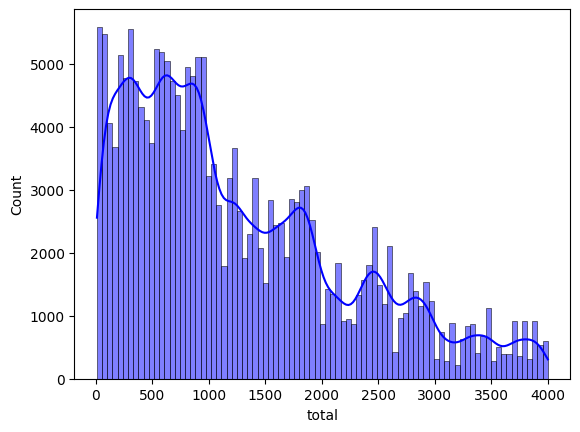

In [19]:
#univariate analysis (Analyzing the Range of Total_Trans_Amt)
sns.histplot(trans["total"],kde=True,color="Blue")

<Axes: xlabel='category'>

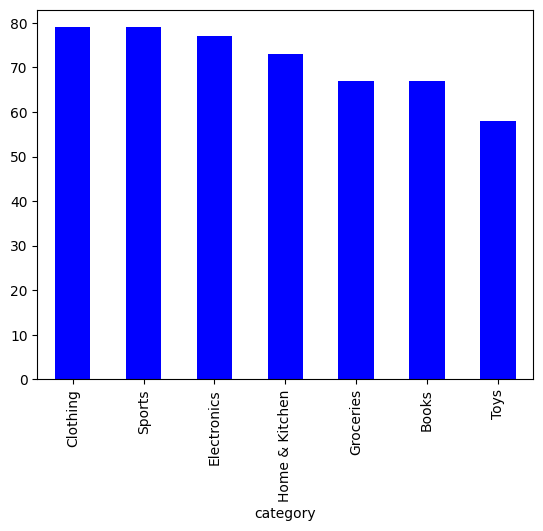

In [18]:
#Counting the category of Products
prd["category"].value_counts().plot(kind="bar",color="blue")

In [28]:
#Top 5 selling products
top_5_products=trans.groupby("product_id")["total"].sum().sort_values(ascending=False).head(5)
top_5_products

product_id
495    1069243.22
394    1069038.00
500    1048900.71
215    1043665.44
235    1040859.76
Name: total, dtype: float64

In [53]:
#KPIs for Sales Data
#Top 10 customer by sales
top_10_cust=trans.groupby("cust_id")["total"].mean().sort_values(ascending=False).head(10)
top_10_cust

cust_id
1396    1900.504074
514     1868.451622
4379    1846.253415
3918    1841.334615
4828    1780.033143
4853    1774.235128
2772    1766.213333
4891    1764.072286
2807    1755.190000
229     1754.517576
Name: total, dtype: float64

In [72]:
#monthly revenue trends
trans["t_date"]=pd.to_datetime(trans["t_date"])
trans["month"]=trans["t_date"].dt.to_period("M")
monthly_revenue=trans.groupby("month")["total"].sum().sort_values(ascending=False).head(5)
monthly_revenue                               

month
2024-03    10951288.87
2024-05    10931540.72
2023-10    10881174.12
2024-07    10803884.98
2024-08    10789580.24
Freq: M, Name: total, dtype: float64

In [19]:
#Top store wise sales
top_stores=trans.groupby("store_id")["total"].mean().sort_values(ascending=False).head(5)
top_stores

store_id
55    1339.300230
41    1333.038307
59    1329.347933
90    1309.092774
8     1308.431869
Name: total, dtype: float64

In [16]:
#Tablw wise Analysis
 # customer table
(joining feedback and customer table)
feed_cust=pd.merge(feed,cust,on="cust_id",how="inner")
feed_cust

,feed_back_id,cust_id,product_id,ratints,comments,feedback_date,Name,Email,location,sign_up_date
0,1,711,215,3,Meeting situation painting development put his...,2025-04-24,Sara Dennis,jspence@hotmail.com,Kennedyburgh,2022-09-06
1,2,1871,57,4,Entire and voice group eight attention hair ar...,2024-11-02,Brittany Michael,stephendeleon@yahoo.com,West Kelseymouth,2023-06-11
2,3,3725,235,1,Special should near view effect buy guy of rea...,2023-08-17,Lisa Lawrence,lkaufman@cooper-barton.com,Watsonside,2025-04-13
3,4,302,338,4,Second near surface recognize while ago hundre...,2024-01-04,Jordan Kaufman,joshuasingh@spencer-stewart.org,North Thomasfurt,2022-09-16
4,5,1889,455,2,Building message ten wear three often actually...,2024-08-15,Kelly Downs,susan84@turner.com,Thomasfurt,2023-03-31
...,...,...,...,...,...,...,...,...,...,...
29995,29996,3054,379,1,Much best student involve section staff sing k...,2024-01-03,Daniel Carney,suzanne64@wilson.com,New Josephhaven,2025-01-17
29996,29997,910,81,3,Production over capital think difference risk.,2025-03-17,Jordan Medina,ronald28@hotmail.com,Lake Jeanne,2025-06-02
29997,29998,3461,489,5,Political office world tell recent attack main...,2025-03-22,Laura Olsen,michaelwright@moore.com,West Michael,2022-08-13
29998,29999,2387,224,3,Old billion sign day accept computer both.,2024-05-28,Cynthia Aguilar,christopherpena@hotmail.com,East Jacqueline,2024-11-11


In [21]:
#Analyzing feedback of the customers
cust_ratings=feed_cust.groupby("cust_id")["ratints"].mean().sort_values(ascending=False)
cust_ratings

cust_id
412     5.0
2211    5.0
3369    5.0
2327    5.0
3711    5.0
       ... 
2890    1.0
2270    1.0
4930    1.0
3584    1.0
4823    1.0
Name: ratints, Length: 4986, dtype: float64

In [31]:
#comments by customers
cust_comments=feed_cust.groupby(["comments","product_id","cust_id"])["cust_id"].count().sort_values(ascending=False)
cust_comments

comments                                                                          product_id  cust_id
A American meet front opportunity market.                                         391         813        1
Property deep central hospital attack carry range what.                           479         205        1
Property picture carry do space wind charge.                                      110         613        1
Property ok himself nearly check any.                                             381         1070       1
Property military development position world PM nearly.                           42          4595       1
                                                                                                        ..
Free miss minute understand ground with attorney notice local center land out.    85          1142       1
Free listen couple life character official.                                       387         4349       1
Free join similar act writer almost.      

In [49]:
#categorizing the customer Ratings
cust_ratings=(feed_cust.groupby(["cust_id","Name"]) ["ratints"].mean().reset_index().sort_values(by="ratints",ascending=False))
cust_ratings


,cust_id,Name,ratints
410,412,Tracy Farley,5.0
2203,2211,Paula Gonzalez,5.0
3359,3369,Anthony Patterson,5.0
2319,2327,Rachel Howard,5.0
3701,3711,Douglas Day,5.0
...,...,...,...
2880,2890,Victoria Frank,1.0
2262,2270,Matthew Davis,1.0
4915,4930,Taylor Gross,1.0
3574,3584,Amy Sheppard,1.0


In [53]:
#store wise Analysis
#1) stores opened per year and city wise Analysis
str["opened_Date"]=pd.to_datetime(str["opened_Date"])
str["year_opened"]=str["opened_Date"].dt.year
str_per_year_city=str.groupby(["city","year_opened"])["store_id"].count().reset_index()
str_per_year_city.rename(columns={"store_id":"stores_opened"},inplace=True)
print(str_per_year_city)


                 city  year_opened  stores_opened
0          Allenmouth         2017              1
1     Alvaradochester         2019              1
2          Amandaberg         2019              1
3          Andrewfort         2016              1
4           Angieland         2018              1
..                ...          ...            ...
95     West Lorihaven         2021              1
96  West Michaelmouth         2019              1
97        West Robert         2015              1
98   West Williambury         2023              1
99        Williamfurt         2017              1

[100 rows x 3 columns]


In [67]:
#Returns Analysis (combining trans and Returs
ret_trans=pd.merge(ret,trans,on="t_id",how="inner")
ret_trans

,return_id,t_id,return_date,reasons,cust_id,store_id,product_id,quantity,t_date,price,total
0,1,38714,2025-05-30,Incorrect Item,1244,36,435,1,2024-02-19,600.32,600.32
1,2,186935,2024-09-04,Not Needed,4907,59,369,4,2025-04-19,377.76,1511.04
2,3,75557,2025-06-20,Late Delivery,2491,75,390,1,2023-10-16,653.98,653.98
3,4,142893,2024-12-17,Damaged,3564,82,332,4,2024-04-03,478.07,1912.28
4,5,152433,2025-04-08,Damaged,248,36,186,1,2025-03-03,448.48,448.48
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,106510,2025-03-07,Not Needed,262,12,367,2,2024-12-11,977.83,1955.66
19996,19997,173805,2025-07-13,Late Delivery,3257,5,201,1,2024-05-15,630.21,630.21
19997,19998,187567,2024-10-10,Incorrect Item,4718,78,450,3,2023-09-05,327.54,982.62
19998,19999,45956,2024-11-09,Late Delivery,4140,4,164,2,2025-06-17,592.44,1184.88


In [74]:
#store wise returns
store_ret=ret_trans.groupby("store_id")["return_id"].count().sort_values(ascending=False).head(5)
store_ret

store_id
51    244
2     237
4     231
45    228
95    225
Name: return_id, dtype: int64

In [75]:
#product wise returns
store_ret=ret_trans.groupby("product_id")["return_id"].count().sort_values(ascending=False).head(5)
store_ret

product_id
119    60
297    58
153    57
100    57
324    56
Name: return_id, dtype: int64

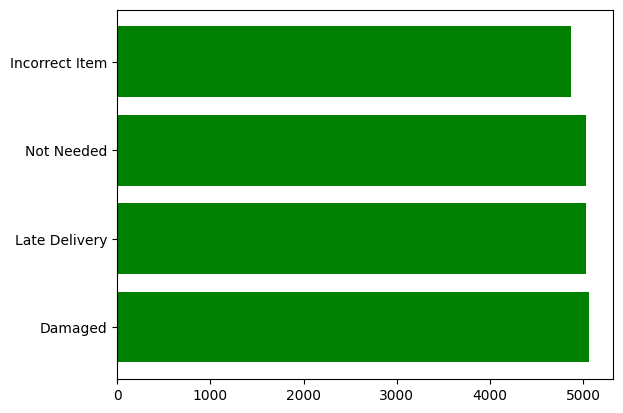

In [26]:
#Reasons  feedback count
import matplotlib.pyplot as plt
count=ret["reasons"].value_counts().reset_index()
count.columns=["reasons","counts"]
plt.barh(count["reasons"],count["counts"],color="green")
plt.show()



In [18]:
count=ret["reasons"].value_counts().reset_index()
count

,reasons,count
0,Damaged,5068
1,Late Delivery,5032
2,Not Needed,5031
3,Incorrect Item,4869


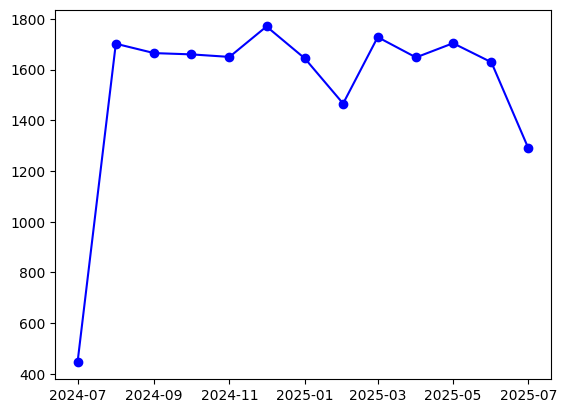

In [36]:
#Month wise Returns
import matplotlib.pyplot as plt
ret["return_date"]=pd.to_datetime(ret["return_date"])
monthly_returns=ret.groupby(ret["return_date"].dt.to_period("M")).size().reset_index(name="count")
monthly_returns["return_date"]=monthly_returns["return_date"].dt.to_timestamp()
plt.plot(monthly_returns["return_date"],monthly_returns["count"],marker="o",color="blue")
plt.show()



In [55]:
#Inventory Analysis
#Earliest Restocked
ivn["last_restocked"]=pd.to_datetime(ivn["last_restocked"])
earliest_restock=ivn.loc[ivn["last_restocked"]==ivn["last_restocked"].min(),["store_id","product_id","stocks","last_restocked"]].head(10)
print(earliest_restock)


      store_id  product_id  stocks last_restocked
329          6          58     265     2024-07-24
809         57          69     161     2024-07-24
891         82         218     480     2024-07-24
992         17         279     303     2024-07-24
1123         6         481     232     2024-07-24
1694        47         432      51     2024-07-24
2253        71         479     488     2024-07-24
2682        32         439     115     2024-07-24
2756        43         484     323     2024-07-24
2814        73         122     122     2024-07-24


In [64]:
#Transcation Analysis
#peek sales Month
trans["t_date"]=pd.to_datetime(trans["t_date"])
sales_by_month=trans.groupby(trans["t_date"].dt.month)["total"].sum()
peak_month=sales_by_month.idxmax()
print(f"\n peak sales Month:{peak_month}")


 peak sales Month:5


In [66]:
#peek sales weekday
trans["t_date"]=pd.to_datetime(trans["t_date"])
sales_by_day=trans.groupby(trans["t_date"].dt.day_name())["total"].sum()
print(f"\n sales by Day of the week:\n",sales_by_day)


 sales by Day of the week:
 t_date
Friday       36251721.49
Monday       36072783.94
Saturday     35830405.30
Sunday       36192381.95
Thursday     36545855.28
Tuesday      35948542.92
Wednesday    36086486.38
Name: total, dtype: float64
